In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Load the dataset
file_path = '/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv'
data = pd.read_csv(file_path)

# Review the structure of the dataset
print("Dataset Info:")
print(data.info())   # Summary of dataset, including data types and missing values
print("\nSummary Statistics:")
print(data.describe())  # Descriptive statistics for numerical columns
print("\nFirst 5 rows of the dataset:")
print(data.head())   # View the first 5 rows to understand the dataset structure


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-n

In [3]:
# Check for missing values
print("\nMissing values count:")
print(data.isnull().sum())  # Count missing values in each column

# Example: Fill missing values in 'TotalCharges' with the median if any
if data['TotalCharges'].isnull().sum() > 0:
    data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)



Missing values count:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [4]:
# Function to detect outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Example: Detecting outliers in 'MonthlyCharges'
outliers = detect_outliers(data, 'MonthlyCharges')
print(f"\nOutliers in MonthlyCharges:\n{outliers}")

# Function to cap outliers
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Apply capping to MonthlyCharges
cap_outliers(data, 'MonthlyCharges')



Outliers in MonthlyCharges:
Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [9]:
# Check for any non-numeric values or blanks in 'TotalCharges'
print(data['TotalCharges'].value_counts())  # This will show if there are any non-numeric values

# Convert 'TotalCharges' to numeric, forcing errors to NaN for handling
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Handle missing values again after conversion (if any appeared during conversion)
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

# Now proceed with scaling
from sklearn.preprocessing import MinMaxScaler

# Ensure 'MonthlyCharges' and 'TotalCharges' are of numeric type
scaler = MinMaxScaler()
data_encoded[['MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(data[['MonthlyCharges', 'TotalCharges']])

# Check the transformed dataset
print("\nTransformed dataset (first 5 rows):")
print(data_encoded[['MonthlyCharges', 'TotalCharges']].head())







TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

Transformed dataset (first 5 rows):
   MonthlyCharges  TotalCharges
0        0.115423      0.001275
1        0.385075      0.215867
2        0.354229      0.010310
3        0.239303      0.210241
4        0.521891      0.015330


/tmp/ipykernel_36/1824212881.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


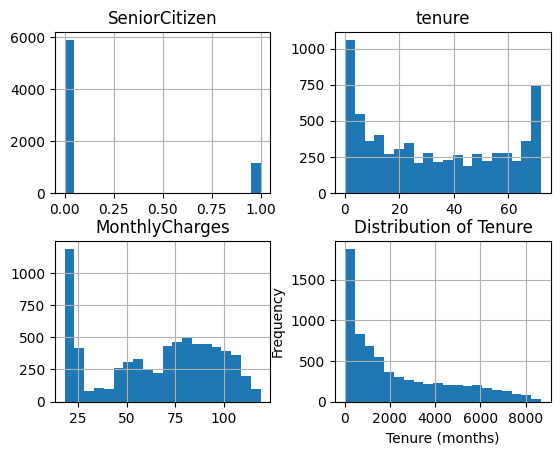

In [11]:
data.hist(bins=20)  # Example for tenure column
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()


<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

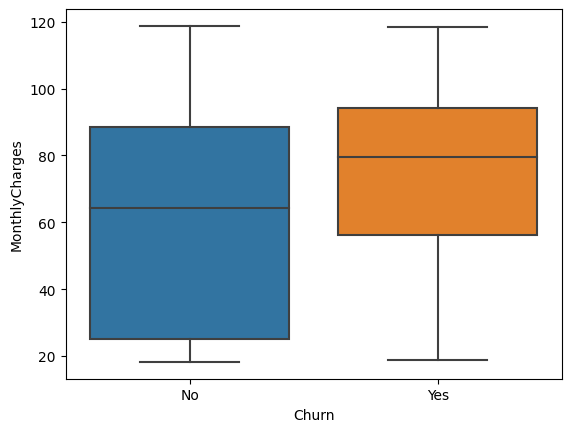

In [12]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)


Text(0.5, 1.0, 'Churn Rate by Contract Type')

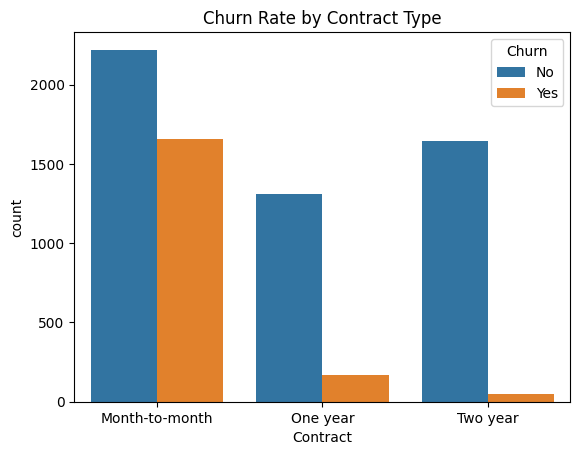

In [13]:
sns.countplot(x='Contract', hue='Churn', data=data)
plt.title('Churn Rate by Contract Type')


Columns in the dataset:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
Missing values in 'Tenure': customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Missing values in 'MonthlyCharges': 0
Missing values in 'Churn': 0

Data types:
MonthlyCharg

/tmp/ipykernel_36/3599143891.py:18: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not pd.api.types.is_categorical_dtype(data['Churn']):


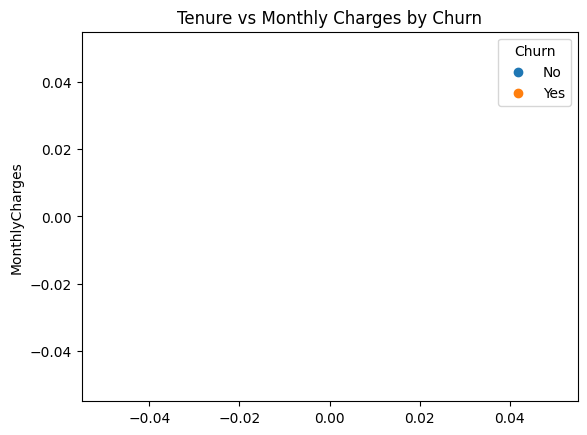

In [49]:
# Step 1: Verify column names in the dataset
print("Columns in the dataset:")
print(data.columns)

# Step 2: Check for missing values in 'Tenure', 'MonthlyCharges', and 'Churn'
print("Missing values in 'Tenure':", data.isnull().sum())
print("Missing values in 'MonthlyCharges':", data['MonthlyCharges'].isnull().sum())
print("Missing values in 'Churn':", data['Churn'].isnull().sum())



# Step 3: Check the data types of 'Tenure', 'MonthlyCharges', and 'Churn'
print("\nData types:")
print(data[['MonthlyCharges', 'Churn']].dtypes)

# Step 4: Ensure 'Tenure' and 'MonthlyCharges' are numeric and 'Churn' is categorical or numeric
# Convert 'Churn' to categorical (if necessary)
if not pd.api.types.is_categorical_dtype(data['Churn']):
    print("\nConverting 'Churn' to a categorical variable.")
    data['Churn'] = data['Churn'].astype('category')

# Step 5: Generate the scatter plot
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the scatter plot after ensuring all conditions are met
sns.scatterplot( y='MonthlyCharges', hue='Churn', data=data)
plt.title('Tenure vs Monthly Charges by Churn')
plt.show()




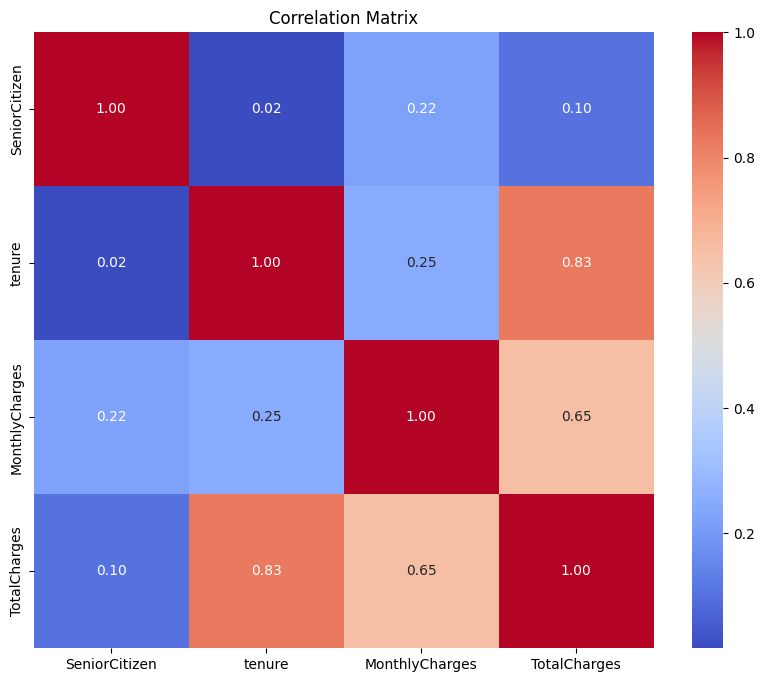

In [54]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])


corr_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na

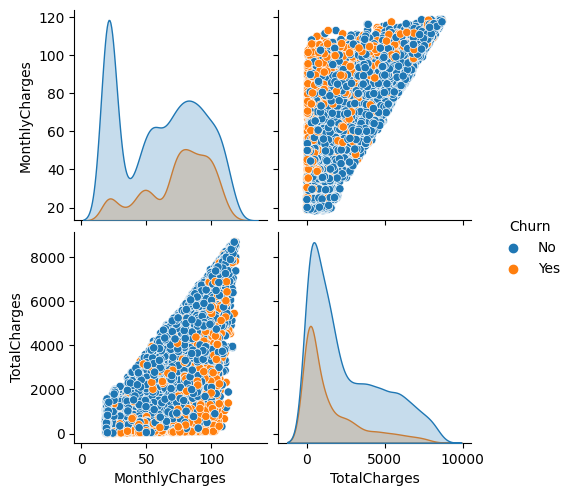

In [72]:
sns.pairplot(data,
 hue='Churn', vars=[ 'MonthlyCharges', 'TotalCharges'])
